In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset_train = pd.read_csv('/kaggle/input/google-stock-prediction/GOOG.csv',parse_dates=True , index_col="date")
dataset_train

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07 00:00:00+00:00,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08 00:00:00+00:00,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09 00:00:00+00:00,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [3]:
dataset_train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB


In [4]:
dataset_train

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07 00:00:00+00:00,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08 00:00:00+00:00,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09 00:00:00+00:00,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [5]:
train_size = int(len(dataset_train)*0.75)
test_size = len(dataset_train)-train_size


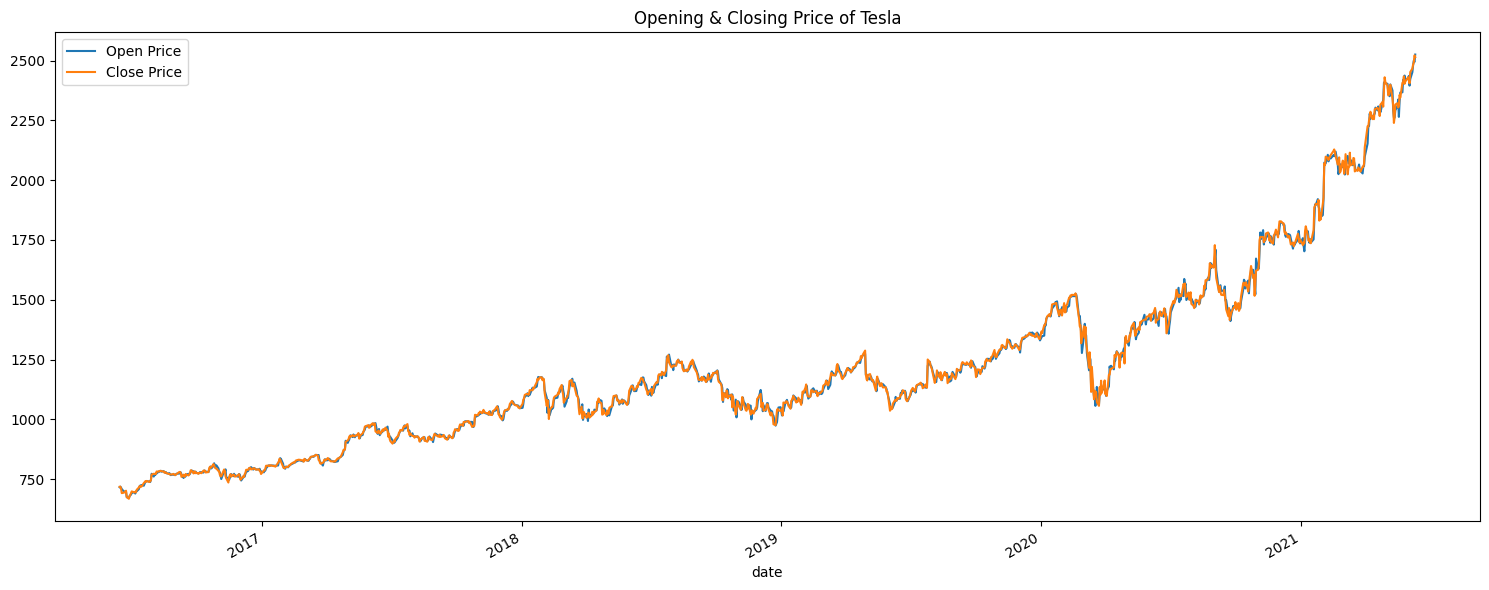

In [6]:
plt.figure(figsize=(15,6))
dataset_train['open'].plot()
dataset_train['close'].plot()
plt.title('Opening & Closing Price of Tesla')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

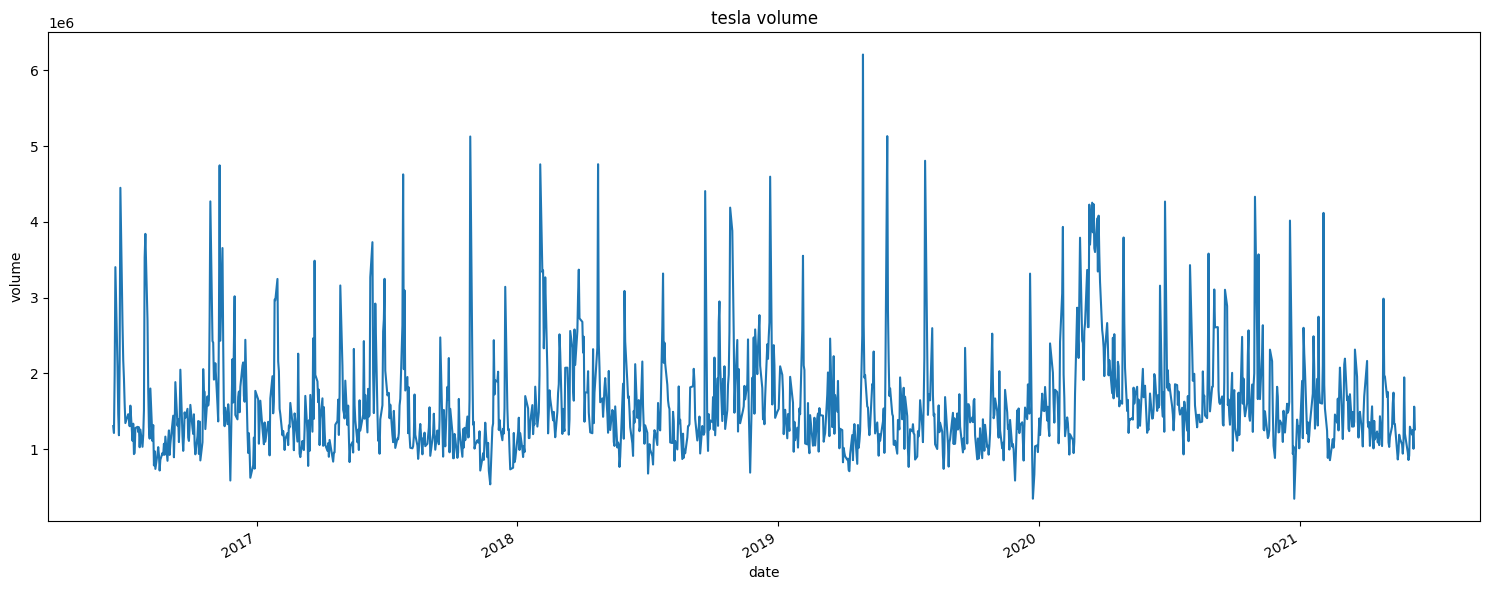

In [7]:
plt.figure(figsize=(15,6))
dataset_train['volume'].plot()
plt.ylabel('volume')
plt.title('tesla volume')
plt.tight_layout()
plt.show()

### preprocessing Data

In [8]:
dataset=dataset_train['close']
dataset = pd.DataFrame(dataset)

data=dataset.values 

data.shape

(1258, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(np.array(data).reshape(-1,1))

In [11]:
train_size = int(len(data)*0.75)
test_size = len(data)-train_size

print(f'Train Size :{train_size}, Test size {test_size}')

train_data = scaled_data[:train_size,0:1] # 0->2217
test_data = scaled_data[train_size-60:,0:1] #  

Train Size :943, Test size 315


In [12]:
X_train = []
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [13]:
X_train , y_train = np.array(X_train),np.array(y_train)

In [14]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Model & Building & Training

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping 

In [16]:
regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))


regressor.add(LSTM(units=50,return_sequences=True))



regressor.add(LSTM(units=50))


regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error')

In [17]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
callbacks = [EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)]
history = regressor.fit(X_train,y_train,epochs = 200,batch_size=32,callbacks=callbacks)

Epoch 1/200
28/28 [==============================] - 9s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0581
Epoch 2/200
28/28 [==============================] - 0s 12ms/step - loss: 8.2640e-04 - mean_absolute_error: 0.0216
Epoch 3/200
28/28 [==============================] - 0s 11ms/step - loss: 5.8668e-04 - mean_absolute_error: 0.0181
Epoch 4/200
28/28 [==============================] - 0s 12ms/step - loss: 5.7556e-04 - mean_absolute_error: 0.0182
Epoch 5/200
28/28 [==============================] - 0s 12ms/step - loss: 5.4081e-04 - mean_absolute_error: 0.0171
Epoch 6/200
28/28 [==============================] - 0s 11ms/step - loss: 5.5772e-04 - mean_absolute_error: 0.0174
Epoch 7/200
28/28 [==============================] - 0s 12ms/step - loss: 5.4387e-04 - mean_absolute_error: 0.0175
Epoch 8/200
28/28 [==============================] - 0s 11ms/step - loss: 4.9979e-04 - mean_absolute_error: 0.0167
Epoch 9/200
28/28 [==============================] - 0s 12ms/step - loss: 4.4706e-04

# Model Evaluation

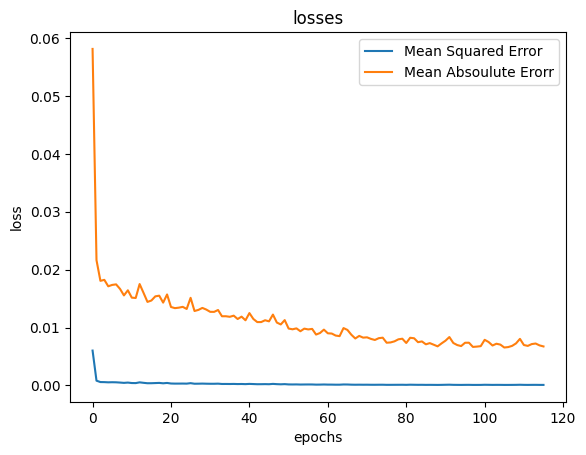

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error','Mean Absoulute Erorr'])
plt.title('losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [20]:
x_test = []
y_test = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])

In [21]:
x_test= np.array(x_test)
y_test=np.array(y_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [23]:
prediction = regressor.predict(x_test)

prediction = sc.inverse_transform(prediction)
prediction.shape

10/10 [==============================] - 1s 5ms/step


(315, 1)

In [24]:
y_test = sc.inverse_transform([y_test])

RMSE = np.sqrt(np.mean(y_test-prediction)**2)
RMSE

0.79048194134425

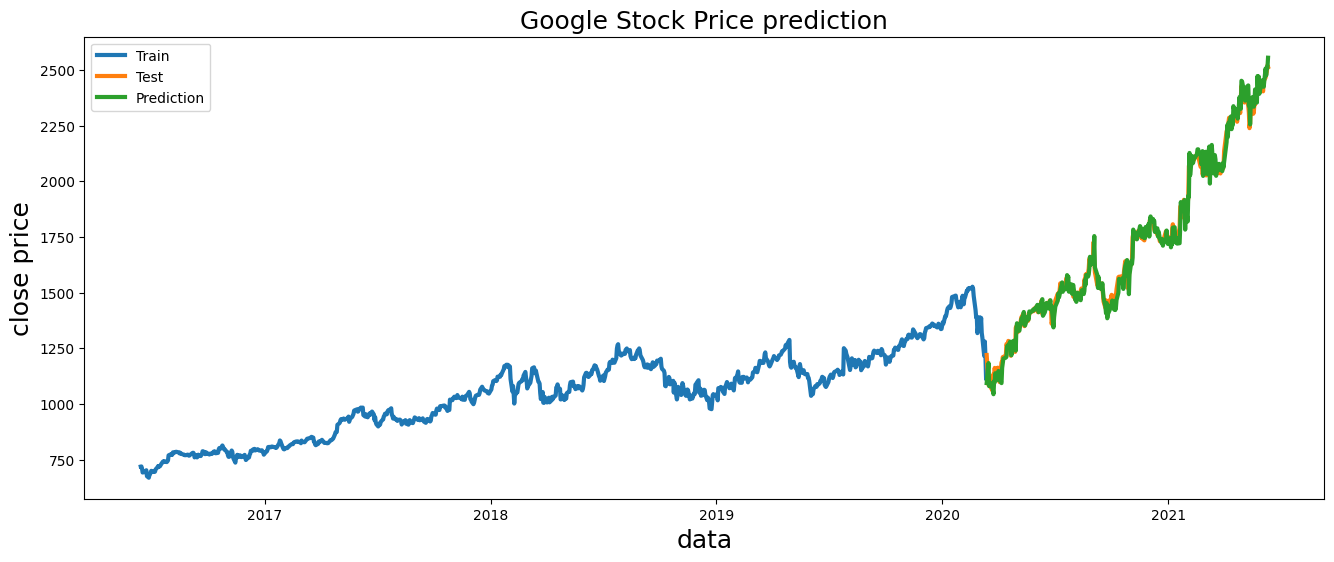

In [25]:
train = dataset.iloc[:train_size,0:1]
test = dataset.iloc[train_size:,0:1]

test['Prediction']=prediction

plt.figure(figsize=(16,6))
plt.title('Google Stock Price prediction',fontsize=18)
plt.xlabel('data',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['close'],linewidth=3)
plt.plot(test['close'],linewidth=3)
plt.plot(test['Prediction'],linewidth=3)
plt.legend(['Train','Test','Prediction'])
plt.show()